# Project: Investigate a Dataset: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### This dataset is a movie dataset includes dfifferent such  features like: ID of the movies, movies names, cast of each movie,  directors of each movie and etc, from the year 1960 upto 2015.

#### The objective from this dataset is to clean it and explore its features to get some conclusion to report it and communicate using it also with some visualizations to express the results. 

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='Question'></a>
## Asking Questions

#### 1) Most Popular Movie
#### 2) Companies with the highest Average Popularity Movies
#### 3) Most  year has maximum revenue plotted
#### 4) Most  year has maximum profit plotted
#### 5) Movie with maximum profit
#### 6) Most Director with maximum average revenue of movies
#### 7) Movie with maximum profit
#### 8) Movies with vote counts above the median
#### 9) Most Action movie with maximum profit
#### 10) Movie with maximum profit
#### 11) Companies with higher average profit

<a id='wrangling'></a>
## Data Wrangling

### General Properties
### Load the data and see its columns

In [152]:
df = pd.read_csv('tmdb-movies.csv')
print(df.columns,"\n")

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object') 



## Data Cleaning

#### 1) Drop the unnecessary features

#### 2) Drop rows with NaN values

#### 3) Remove duplicate rows (if any)

In [153]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Droping not needed columns
df.drop(['id','imdb_id','cast', 'homepage','tagline', 'keywords', 'overview',
       'runtime','release_date','vote_average','budget_adj',
       'revenue_adj','director'],axis = 1, inplace = True)

In [154]:
## seeing the properties of each cloumn,
# and if there are NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_count            10866 non-null  int64  
 7   release_year          10866 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 679.2+ KB


In [155]:
# Drop rows with NaN values
df.dropna(axis = 0,inplace = True)

In [156]:
# Remove duplicate rows (if any)
df.drop_duplicates(inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1) Most Popular Movie

In [157]:
# getting the most popular movie in this dataset
max_popularity = df.popularity.max()
top_popular_movie = df[df['popularity'] == max_popularity]
top_popular_movie = top_popular_movie.original_title[0]
top_popular_movie

'Jurassic World'

### It is found that the most popular movie in the dataset is "Jurassic World"
### ----------------------------------------------------------------------------------------------------------------------------

### Research Question 2) Companies with the highest Average Popularity Movies

In [158]:
# getting Companies with the highest Average Popularity Movies
Company_popularity_average = df.groupby('production_companies').popularity.mean()
Company_popularity_average.sort_values().index[-1]

'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu'

### It is found that the Most companies made movies together with highest average popularity are Those [Universal Studios, Amblin Entertainment, Legendary Pictures, Fuji Television Network, Dentsu]

### ----------------------------------------------------------------------------------------------------------------------------

### Research Question 3)  Most year has maximum revenue

In [159]:
df_max_year_revenue = df.groupby('release_year')['revenue'].sum()
df_max_year_revenue[df_max_year_revenue == df_max_year_revenue.max()].index[0]

2015

### It is found that the year has maximum revenue in the dataset is 2015
### -----------------------------------------------------------------------------------------------------------

In [160]:
# custom function to wrap a visualiztion function using bar chart plot
def display_barplot(feature, xlabel, ylabel, title):
    """ a function that takes four arguments
        to plot a graph of a variable as a bar chart
        to conclude some information from it
        
        (feature): the variable to be plotted
        (xlabel): the label of the x-axis of the plot
        (ylabel): the label of the y-axis of the plot
        (title): the title of the plot
    """
    plt.bar(feature.index, feature);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.show();
    
    
def display_histogram(feature):
    """a function that takes 1 argument to show the distribution of a feature
        using histogram plot and all its summarize describe statistics
        
        (feature): the variable to show its distribution and statistics
    """
    print(feature.describe())
    plt.hist(feature);

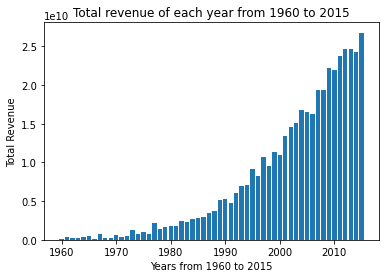

In [161]:
display_barplot(df_max_year_revenue, 'Years from 1960 to 2015', 'Total Revenue', 'Total revenue of each year from 1960 to 2015')

### The plot above shows that it is sharply left skewed, which means that over the years the popularity of movies is increasing

### ----------------------------------------------------------------------------------------------------------------------------

### Research Question 4) Most year has maximum profit

In [162]:
df['profit'] = df['revenue'] - df['budget']
df_max_year_profit = df.groupby('release_year')['profit'].sum()
df_max_year_profit[df_max_year_profit == df_max_year_profit.max()].index[0]

2015

### It is found that the year has maximum profit in the dataset is 2015

count    9.826000e+03
mean     2.789606e+07
std      1.011871e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.404158e+07
max      2.544506e+09
Name: profit, dtype: float64


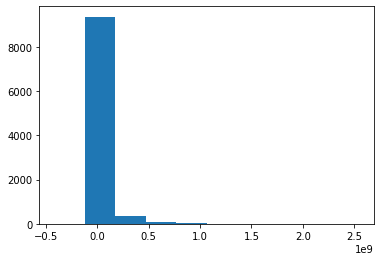

In [163]:
display_histogram(df.profit)

### The distribution of the profit feature in the dataset is seems to be right skewed, which means that more than 75% of the profits of movies in this dataset over the years from 1960 up to 2015 is below the average of the profit

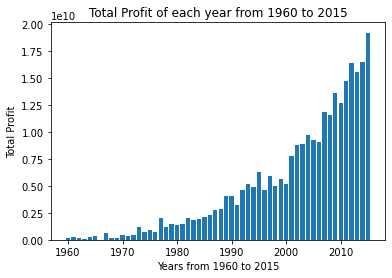

In [164]:
display_barplot(df_max_year_profit, 'Years from 1960 to 2015', 'Total Profit', 'Total Profit of each year from 1960 to 2015')

### The plot above shows that it is a left skewed, which means that over the years the popularity of movies is increasing and the profit of each decade is increasing comparable to the decades before

### ----------------------------------------------------------------------------------------------------------------------------
###  Research Question 5) The average rate of growth of revenue for each year in the dateset from 1960 to 2015

count    9826.000000
mean     2000.903216
std        13.032568
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64


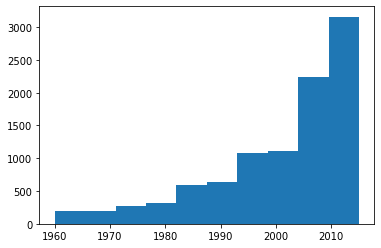

In [165]:
display_histogram(df.release_year)

### The distribution of the release_year feature in the dataset is seems to be left skewed, which means that as we go over the years as we produce more and more movies, more than the past years

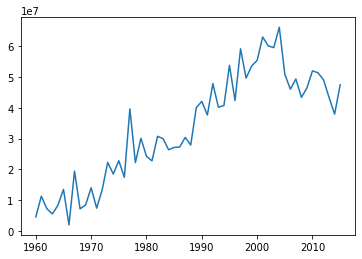

In [166]:
plt.plot(df.groupby('release_year').revenue.mean());

### We conclude that the average rate of growth of revenue for each year in the dateset is increasing from the first year in the dataset (1960) till nearly 2004, and it starts to decrease to the last year in the dataset (2015)

### ----------------------------------------------------------------------------------------------------------------------------
###  Research Question 6) Movie with maximum profit

In [167]:
df.groupby('original_title')['profit'].max().index[3]

'(500) Days of Summer'

### We conclude that the movie with maximum profit is "(500) Days of Summer"

### ----------------------------------------------------------------------------------------------------------------------------
###  Research Question 7) Most Action movie with maximum profit

In [168]:
df_action = df.query('"Action" in genres')
max_profit = df_action.groupby('original_title').profit.max().max()
df[df['profit'] == max_profit]['original_title']

25    Mission: Impossible - Rogue Nation
Name: original_title, dtype: object

### We found that the Action movie with the maximum profit is "Mission: Impossible - Rogue Nation"

### ----------------------------------------------------------------------------------------------------------------------------
###  Research Question 8) Number of movies with vote counts above the median

In [169]:
median_ = df['vote_count'].median()
df_counts = df[df['vote_count'] > median_]
df_counts.original_title.count()

4912

### We found that just 4912 out if 9826 movies have vote counts above the median of all vote counts

### ----------------------------------------------------------------------------------------------------------------------------
###  Research Question 9) Popularity of movies in each year from 1960 to 2015

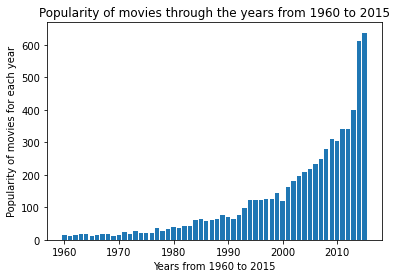

In [170]:
df_popularity = df.groupby('release_year')['popularity'].sum()

display_barplot(df_popularity, 'Years from 1960 to 2015', 'Popularity of movies for each year', 'Popularity of movies through the years from 1960 to 2015')

### The above plot shows that the year 2015 is the most popular year for movies

### ----------------------------------------------------------------------------------------------------------------------------
###  Research Question 10) Most common genre of movies occured in this dataset

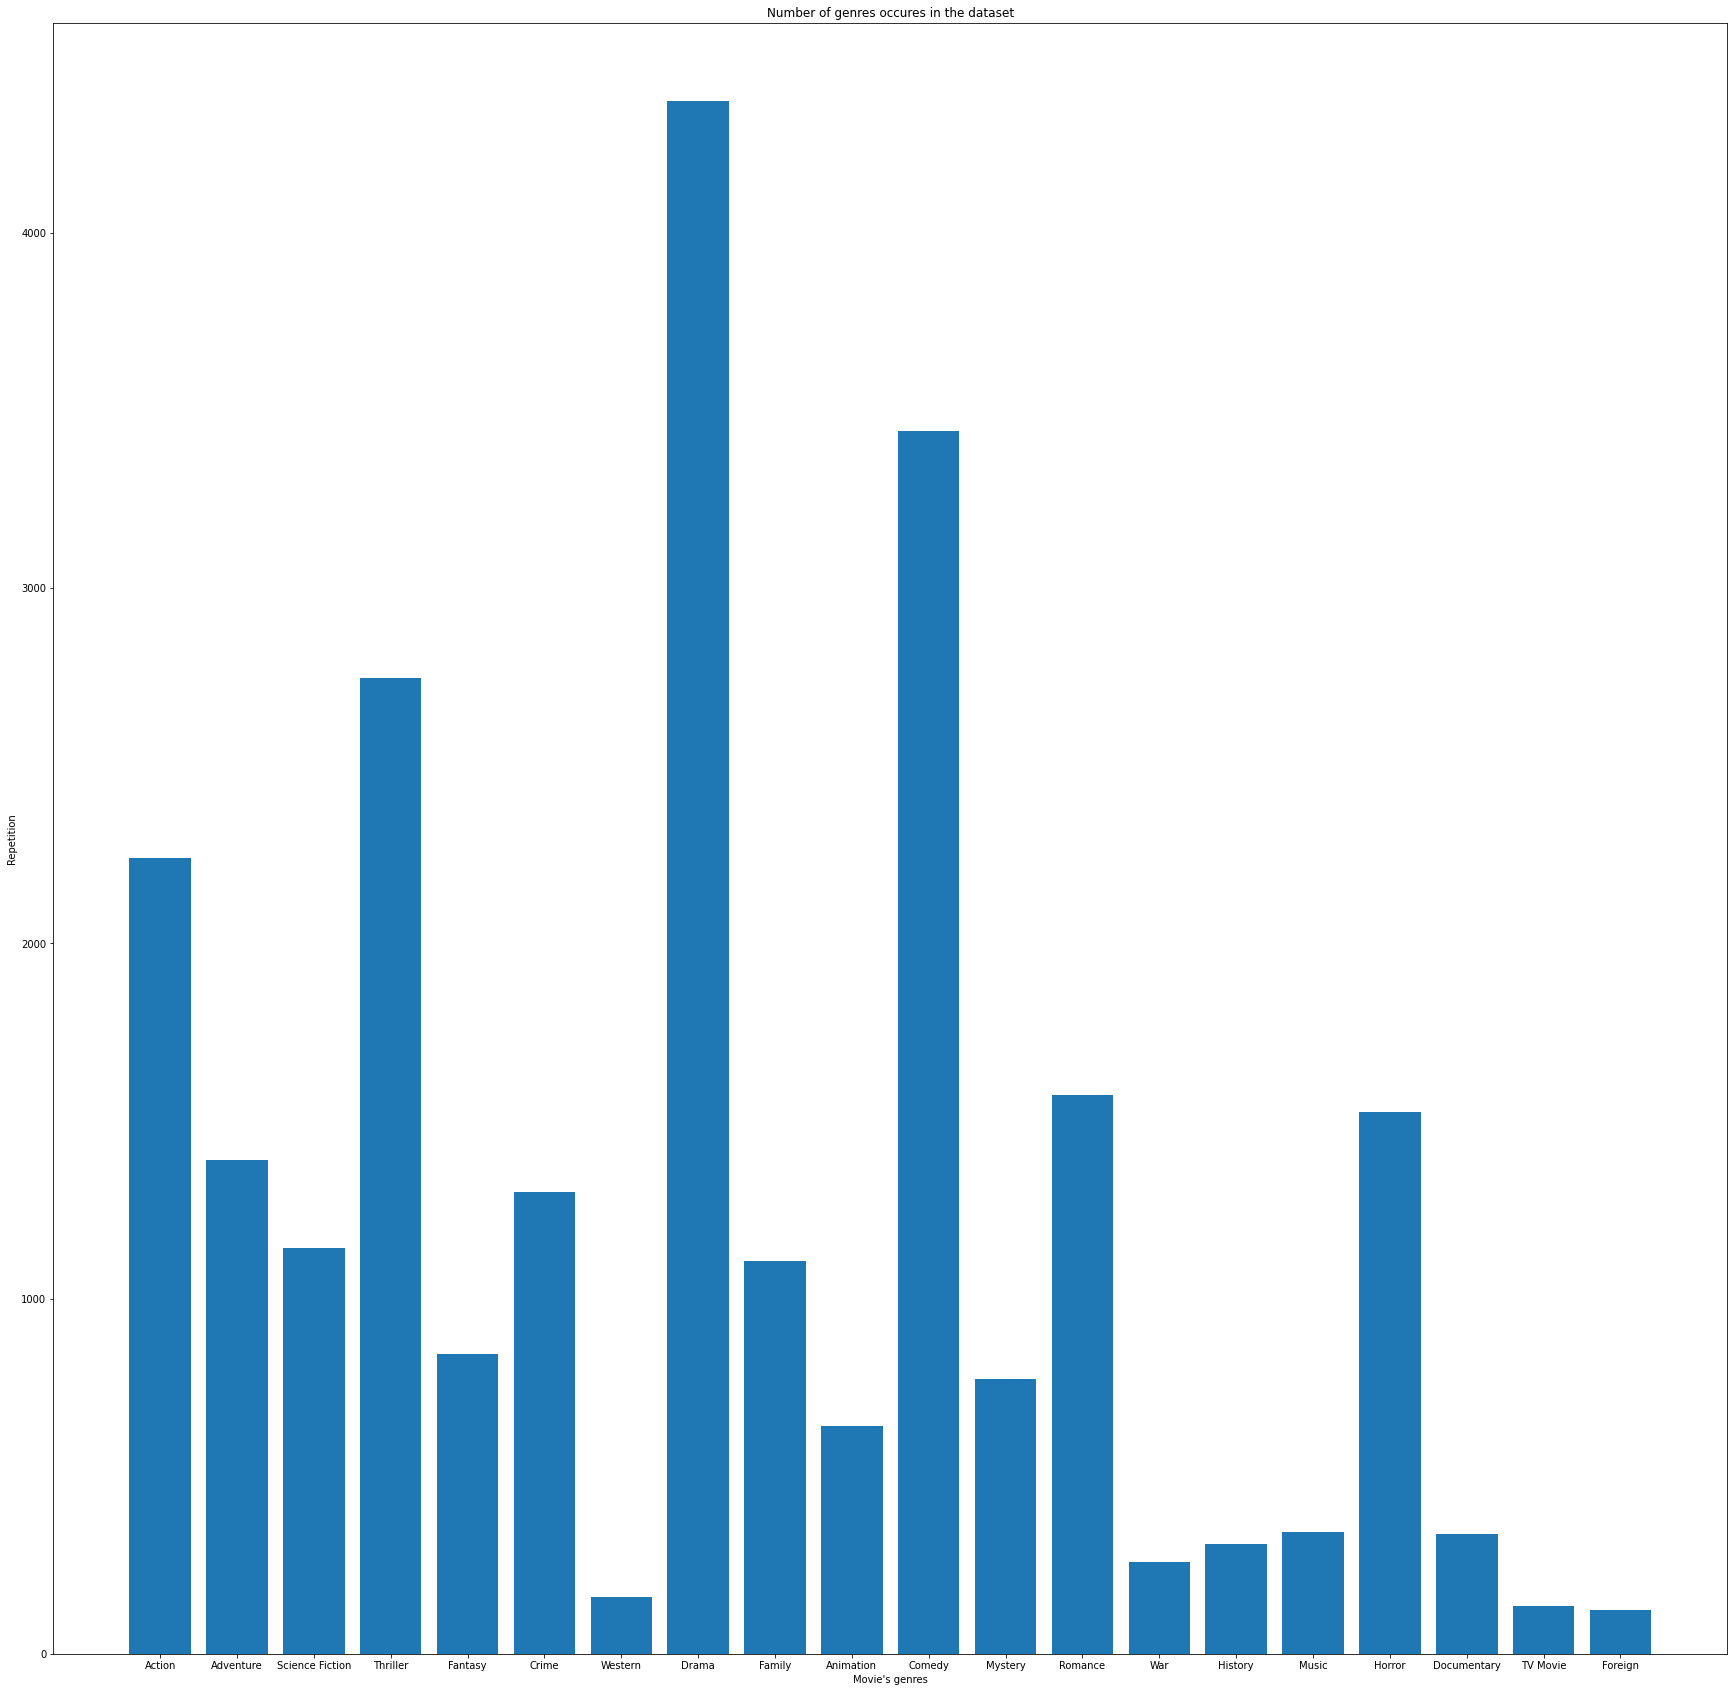

In [171]:
new_df = df['genres'].apply(lambda x:x.split("|"))
dict_movie={}
for genre in new_df:
    for type_ in genre:
        if type_ in dict_movie:
            dict_movie[type_] += 1
        else:
            dict_movie[type_] = 1

series = pd.Series(dict_movie)

plt.figure(figsize = (30,30));
display_barplot(series, "Movie's genres", 'Repetition', 'Number of genres occures in the dataset')

### From the Figure above we found that the most genre repeated in this dataset is "Drama", while the least genre repeated is this dataset is "Foreign" 

### ----------------------------------------------------------------------------------------------------------------------------
###  Research Question 11) The relation between revenue and popularity features

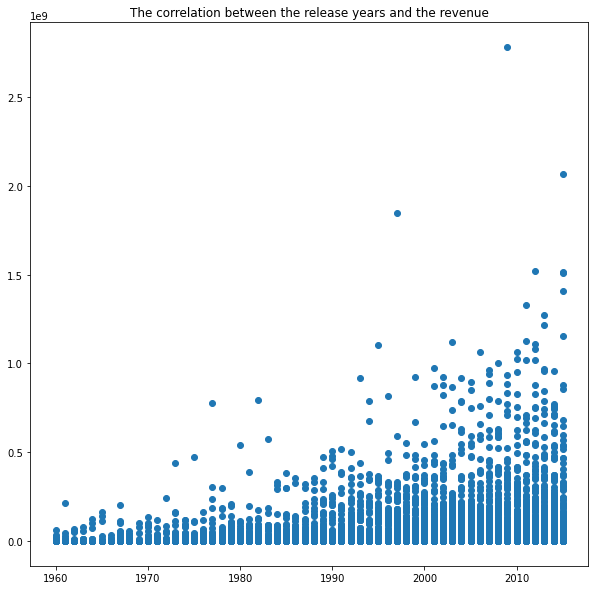

In [185]:
plt.figure(figsize=(10,10));
plt.scatter(x = df.release_year, y = df.revenue);
plt.title('The correlation between the release years and the revenue');

### we see in the plot above that as the year passed as the popularity of movies increases, so the revenue nearly increases
### -------------------------------------------------------------------------------------------------------------------------------------------

<a id='conclusions'></a>
## Conclusions
### At the end, from the dataset explored above, there are few conclusions we got from it, and some of them are:
#### 1) The data provided by the dataset was sufficient to answet the posed questions
#### 2) Some features were excluded from the dataset because they were redundant based on the posed questions at the beginning
#### 3) We found that there is nearly strong positive correlation between the release year and the revenue features in the dataset
#### 4) It is concluded that the movies that has a Drama genre is the mode (most repeated) in this data set
#### 5) The size of the dataset was sort of sufficient to give good judgment about the questions posed
#### 6) Cleaning the data in the dataset was did not made any difficult and was not a bad decision to remove duplicate tuples and Nan Values, rather than features that were not be used in analysis
#### 7) We conclude that 4912 movies out of 9826 in the dataset after data cleaning got a vote count above the median of vote_count feature